# Incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os
import urllib

Les données de l'incidence de la varicelle sont disponibles sur le site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1991 et se termine avec une semaine récente.

In [2]:
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json)

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

Position du fichier sur le disque dur. S'il existe alors je ne fais rien. Sinon je le télécharge sur le web.

In [3]:
data_filename = "analyse-varicelle.csv"
# Si les données ne sont pas disponibles localement
if not(os.path.exists(data_filename)):
    # Alors les télécharger depuis le site officiel
    urllib.request.urlretrieve(data_url,data_filename)
# Vérifier que le fichier n'est pas vide
assert os.path.getsize(data_filename)>0

In [4]:
raw_data = pd.read_csv(data_filename, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202012          7   8192     5822   10562      12           8   
1     202011          7  10198     7568   12828      15          11   
2     202010          7   9011     6691   11331      14          10   
3     202009          7  13631    10544   16718      21          16   
4     202008          7  10424     7708   13140      16          12   
5     202007          7   8959     6574   11344      14          10   
6     202006          7   9264     6925   11603      14          10   
7     202005          7   8505     6314   10696      13          10   
8     202004          7   7991     5831   10151      12           9   
9     202003          7   5968     4100    7836       9           6   
10    202002          7   6534     4530    8538      10           7   
11    202001          7   9835     7019   12651      15          11   
12    201952          7   7941     5246   10636      12           8   
13    201951          7   5823     3675    7971       9           6   
14    201950          7   6424     4276    8572      10           7   
15    201949          7   6621     4540    8702      10           7   
16    201948          7   5542     3383    7701       8           5   
17    201947          7   7536     5058   10014      11           7   
18    201946          7   2638     1316    3960       4           2   
19    201945          7   4492     2615    6369       7           4   
20    201944          7   5728     3627    7829       9           6   
21    201943          7   4834     2751    6917       7           4   
22    201942          7   6279     3989    8569      10           7   
23    201941          7   4130     2030    6230       6           3   
24    201940          7   4211     2218    6204       6           3   
25    201939          7   3137     1310    4964       5           2   
26    201938          7   3078     1416    4740       5           2   
27    201937          7    970      162    1778       1           0   
28    201936          7   1277      263    2291       2           0   
29    201935          7    922        0    1857       1           0   
...      ...        ...    ...      ...     ...     ...         ...   
1499  199126          7  17608    11304   23912      31          20   
1500  199125          7  16169    10700   21638      28          18   
1501  199124          7  16171    10071   22271      28          17   
1502  199123          7  11947     7671   16223      21          13   
1503  199122          7  15452     9953   20951      27          17   
1504  199121          7  14903     8975   20831      26          16   
1505  199120          7  19053    12742   25364      34          23   
1506  199119          7  16739    11246   22232      29          19   
1507  199118          7  21385    13882   28888      38          25   
1508  199117          7  13462     8877   18047      24          16   
1509  199116          7  14857    10068   19646      26          18   
1510  199115          7  13975     9781   18169      25          18   
1511  199114          7  12265     7684   16846      22          14   
1512  199113          7   9567     6041   13093      17          11   
1513  199112          7  10864     7331   14397      19          13   
1514  199111          7  15574    11184   19964      27          19   
1515  199110          7  16643    11372   21914      29          20   
1516  199109          7  13741     8780   18702      24          15   
1517  199108          7  13289     8813   17765      23          15   
1518  199107          7  12337     8077   16597      22          15   
1519  199106          7  10877     7013   14741      19          12   
1520  199105          7  10442     6544   14340      18          11   
1521  199104          7   7913     4563   11263      14           8   
1522  199103          7  15387    10484   20290      27          18   
1523  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ? Non, il n'y pas de points manquants. (2020-04-05T19:59:00)

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Nous éliminons ces points manquants du jeu de données.

In [8]:
data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202012          7   8192     5822   10562      12           8   
1     202011          7  10198     7568   12828      15          11   
2     202010          7   9011     6691   11331      14          10   
3     202009          7  13631    10544   16718      21          16   
4     202008          7  10424     7708   13140      16          12   
5     202007          7   8959     6574   11344      14          10   
6     202006          7   9264     6925   11603      14          10   
7     202005          7   8505     6314   10696      13          10   
8     202004          7   7991     5831   10151      12           9   
9     202003          7   5968     4100    7836       9           6   
10    202002          7   6534     4530    8538      10           7   
11    202001          7   9835     7019   12651      15          11   
12    201952          7   7941     5246   10636      12           8   
13    201951          7   5823     3675    7971       9           6   
14    201950          7   6424     4276    8572      10           7   
15    201949          7   6621     4540    8702      10           7   
16    201948          7   5542     3383    7701       8           5   
17    201947          7   7536     5058   10014      11           7   
18    201946          7   2638     1316    3960       4           2   
19    201945          7   4492     2615    6369       7           4   
20    201944          7   5728     3627    7829       9           6   
21    201943          7   4834     2751    6917       7           4   
22    201942          7   6279     3989    8569      10           7   
23    201941          7   4130     2030    6230       6           3   
24    201940          7   4211     2218    6204       6           3   
25    201939          7   3137     1310    4964       5           2   
26    201938          7   3078     1416    4740       5           2   
27    201937          7    970      162    1778       1           0   
28    201936          7   1277      263    2291       2           0   
29    201935          7    922        0    1857       1           0   
...      ...        ...    ...      ...     ...     ...         ...   
1499  199126          7  17608    11304   23912      31          20   
1500  199125          7  16169    10700   21638      28          18   
1501  199124          7  16171    10071   22271      28          17   
1502  199123          7  11947     7671   16223      21          13   
1503  199122          7  15452     9953   20951      27          17   
1504  199121          7  14903     8975   20831      26          16   
1505  199120          7  19053    12742   25364      34          23   
1506  199119          7  16739    11246   22232      29          19   
1507  199118          7  21385    13882   28888      38          25   
1508  199117          7  13462     8877   18047      24          16   
1509  199116          7  14857    10068   19646      26          18   
1510  199115          7  13975     9781   18169      25          18   
1511  199114          7  12265     7684   16846      22          14   
1512  199113          7   9567     6041   13093      17          11   
1513  199112          7  10864     7331   14397      19          13   
1514  199111          7  15574    11184   19964      27          19   
1515  199110          7  16643    11372   21914      29          20   
1516  199109          7  13741     8780   18702      24          15   
1517  199108          7  13289     8813   17765      23          15   
1518  199107          7  12337     8077   16597      22          15   
1519  199106          7  10877     7013   14741      19          12   
1520  199105          7  10442     6544   14340      18          11   
1521  199104          7   7913     4563   11263      14           8   
1522  199103          7  15387    10484   20290      27          18   
1523  199102          7  16277  

Nos données utilisent une convention inhabituelle: le numéro de semaine est collé à l'année, donnant l'impression qu'il s'agit de nombre entier. C'est comme ça que Pandas les interprète.

Un deuxième problème est que Pandas ne comprend pas les numéros de semaine. Il faut lui fournir les dates de début et de fin de semaine. Nous utilisons pour cela la bibliothèque isoweek.

Comme la conversion des semaines est devenu assez complexe, nous écrivons une petite fonction Python pour cela. Ensuite, nous l'appliquons à tous les points de nos donnés. Les résultats vont dans une nouvelle colonne 'period'.

In [9]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [11]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

In [13]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Il n'y a pas d'incohérence à noter. (2020-04-05T20:12:00)

Le prétraitement des données est terminé, nous pouvons commencer l'exploration.

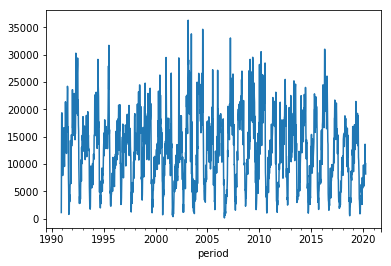

In [41]:
sorted_data['inc'].plot()

Les données sont trés oscillantes au cours du temps. Nous allons décomposer cette série chronologique comme une somme de séries afin d'avoir une interprétation plus éclairée.

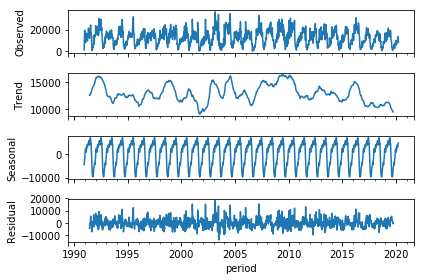

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
# freq = 52 car 52 semaines par an
result = seasonal_decompose(sorted_data['inc'],model="additive", freq=52)
result.plot()
plt.show()

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

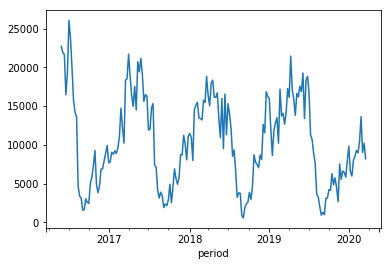

In [44]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval entre deux années civiles, nous définissons la période de référence entre deux minima de l'incidence, du 1er août de l'année 𝑁
au 1er août de l'année 𝑁+1

.

Notre tâche est un peu compliquée par le fait que l'année ne comporte pas un nombre entier de semaines. Nous modifions donc un peu nos périodes de référence: à la place du 1er août de chaque année, nous utilisons le premier jour de la semaine qui contient le 1er août.

Comme l'incidence de la varicelle est très faible en été, cette modification ne risque pas de fausser nos conclusions.

Encore un petit détail: Nous éliminons la première année qui pourrait ne pas contenir 12 mois.

In [70]:
first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]
first_august_week

[Period('1991-07-29/1991-08-04', 'W-SUN'),
 Period('1992-07-27/1992-08-02', 'W-SUN'),
 Period('1993-07-26/1993-08-01', 'W-SUN'),
 Period('1994-08-01/1994-08-07', 'W-SUN'),
 Period('1995-07-31/1995-08-06', 'W-SUN'),
 Period('1996-07-29/1996-08-04', 'W-SUN'),
 Period('1997-07-28/1997-08-03', 'W-SUN'),
 Period('1998-07-27/1998-08-02', 'W-SUN'),
 Period('1999-07-26/1999-08-01', 'W-SUN'),
 Period('2000-07-31/2000-08-06', 'W-SUN'),
 Period('2001-07-30/2001-08-05', 'W-SUN'),
 Period('2002-07-29/2002-08-04', 'W-SUN'),
 Period('2003-07-28/2003-08-03', 'W-SUN'),
 Period('2004-07-26/2004-08-01', 'W-SUN'),
 Period('2005-08-01/2005-08-07', 'W-SUN'),
 Period('2006-07-31/2006-08-06', 'W-SUN'),
 Period('2007-07-30/2007-08-05', 'W-SUN'),
 Period('2008-07-28/2008-08-03', 'W-SUN'),
 Period('2009-07-27/2009-08-02', 'W-SUN'),
 Period('2010-07-26/2010-08-01', 'W-SUN'),
 Period('2011-08-01/2011-08-07', 'W-SUN'),
 Period('2012-07-30/2012-08-05', 'W-SUN'),
 Period('2013-07-29/2013-08-04', 'W-SUN'),
 Period('20

En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code. Nous commençons donc l'analyse en 1991

In [73]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    if not abs(len(one_year)-52) < 2:
        raise Exception("Mauvaise taille de semaines : ",len(one_year))
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

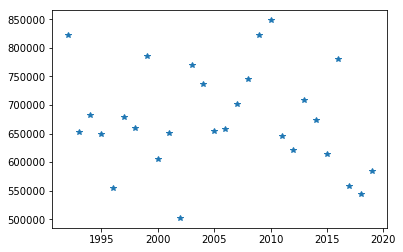

In [76]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).


In [80]:
yearly_incidence.sort_values(ascending=False)

2010    848236
2009    822819
1992    821558
1999    784963
2016    780645
2003    770211
2008    745701
2004    736266
2013    708874
2007    701566
1994    682920
1997    679308
2014    673458
1998    660316
2006    657482
2005    654308
1993    653058
2001    650660
1995    648598
2011    645042
2012    620315
2015    613286
2000    605096
2019    584926
2017    557449
1996    553859
2018    543281
2002    502271
dtype: int64

SyntaxError: unexpected EOF while parsing (<ipython-input-83-7fad2c5392d6>, line 1)